# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'D:\\learning_ai\\D13\\'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:\learning_ai\D13\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
"""
Your code here
"""
# https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc
# cut 能將資料依照區間分組, 區間包含上限不包含下限 (下限,上限]
cut_rule = [0,0.99,2,5,max(app_train["CNT_CHILDREN"])]
group_name = ["0 個小孩", "1-2 個小孩", "3-5 個小孩", "超過 5 個小孩"]

# cut(要處理的資料(array), 分組原則, labels各組標籤名)
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, labels=group_name, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 個小孩       215371
1-2 個小孩      87868
3-5 個小孩       4230
超過 5 個小孩        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
#2-1
"""
Your code here
"""
grp = ["CNT_CHILDREN_GROUP", "TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0 個小孩               0         166747.010980
                    1         160804.210548
1-2 個小孩             0         174590.584401
                    1         176115.362720
3-5 個小孩             0         175053.742913
                    1         160677.385714
超過 5 個小孩            0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\gl4cj\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


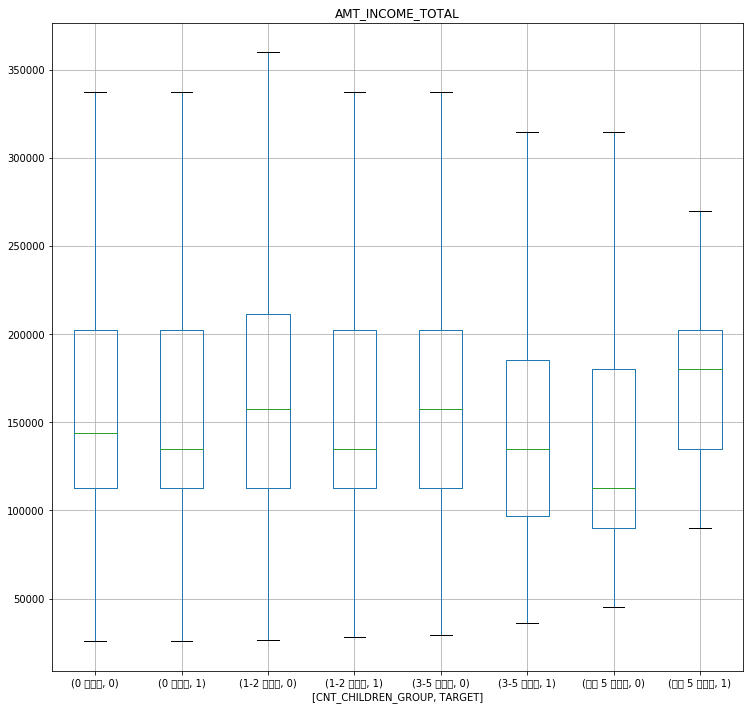

In [6]:
#2-2
"""
Your code here
"""
# 畫盒狀圖boxplot：https://www.itread01.com/content/1541665023.html

plt_column = 'AMT_INCOME_TOTAL'
plt_by = ["CNT_CHILDREN_GROUP", "TARGET"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [7]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-x.mean())/x.std() )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
